## Embeddings en OpenAI usando el modelo : text-embedding-ada-002

In [1]:
import openai
import os
import getpass

In [2]:
openai.api_key = getpass.getpass("Ingresa tu API Key de OpenAI : ")

In [7]:
def generate_embedding_openai(text, model = "text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.embeddings.create(input = text, model = model).to_dict()['data'][0]['embedding']

In [8]:
embedding = generate_embedding_openai("Me gusta la comida china")

In [9]:
embedding

[-0.0006848692428320646,
 -0.004852961748838425,
 0.0030403181444853544,
 -0.0006362485000863671,
 -0.024249613285064697,
 -0.013261317275464535,
 -0.016859255731105804,
 -0.022815300151705742,
 0.003710373304784298,
 -0.030655400827527046,
 0.018500206992030144,
 0.01403925009071827,
 0.01036230381578207,
 -0.012507695704698563,
 -0.011158469133079052,
 0.009353422559797764,
 0.03026643581688404,
 -0.00901307724416256,
 0.020080382004380226,
 -0.008235144428908825,
 -0.015364166349172592,
 0.018451586365699768,
 0.01074519194662571,
 -0.02080969326198101,
 -0.018852706998586655,
 0.00996726006269455,
 0.010514243505895138,
 -0.008216911926865578,
 0.005864881444722414,
 -0.004132766276597977,
 0.040428176522254944,
 0.004120611120015383,
 -0.007578764110803604,
 -0.005369557533413172,
 0.007992040365934372,
 -0.017381928861141205,
 -0.02287607640028,
 -0.020007450133562088,
 -0.0008288323297165334,
 0.002886858768761158,
 0.0023413943126797676,
 0.02140529826283455,
 0.007961652241647

In [10]:
#Dimensiones del embedding
len(embedding)

1536

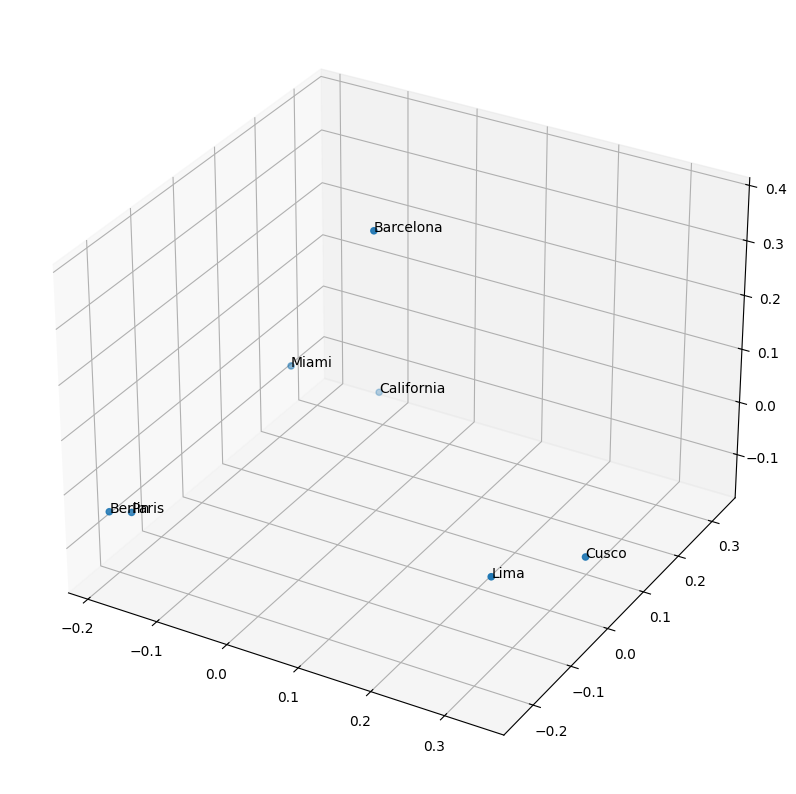

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cities = ["Lima", "Cusco", "Berlin", "Paris", "California", "Barcelona", "Miami"]
df = pd.DataFrame({"city" : cities})

# Genera embeddings para cada ciudad utilizando la función 'generate_embedding_openai'
# y almacenar estos embeddings en una nueva columna llamada 'cities_embeddings'.
df["cities_embeddings"] = [generate_embedding_openai(city) for city in cities]

# Inicializa el algoritmo PCA para reducir la dimensionalidad a 3 componentes.
pca = PCA(n_components = 3)

# Aplica PCA a los embeddings de las ciudades y almacenar el resultado en 't'.
t = pca.fit_transform(df['cities_embeddings'].tolist())

# Inicializar una figura para la visualización con un tamaño específico.
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111, projection = "3d")

# Graficar los puntos en 3D usando los resultados de PCA.
ax.scatter(t[:,0], t[:,1], t[:,2])

# Anotar cada punto con el nombre de la ciudad correspondiente.
for i, txt in enumerate(cities):
    ax.text(t[i,0], t[i,1], t[i,2], txt)

plt.show()

## Embeddings usando el modelo : sentence-transformers/all-MiniLM-L6-v2

In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["Me gusta la pizza"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

In [12]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

emb1 = model.encode("Me gusta la comida china")
emb2 = model.encode("No me gusta ir a la playa")

In [13]:
len(emb1), len(emb2)

(384, 384)

In [14]:
def generate_embedding_all_MiniLM(text):
   text = text.replace("\n", " ")
   return model.encode(text)

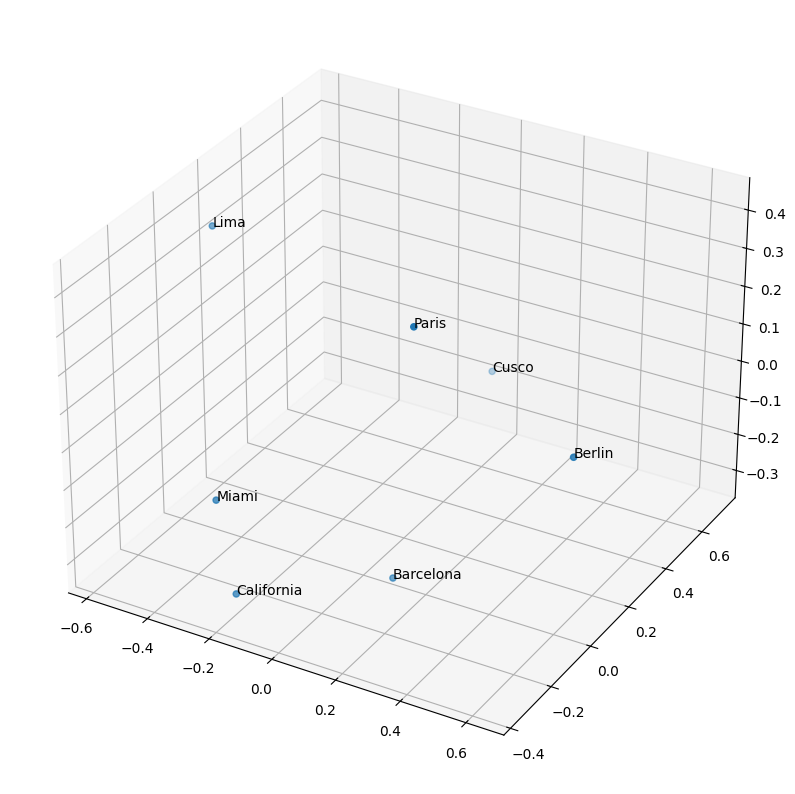

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cities = ["Lima", "Cusco", "Berlin", "Paris", "California", "Barcelona", "Miami"]
df = pd.DataFrame({"city" : cities})

# Genera embeddings para cada ciudad utilizando la función 'generate_embedding_all_MiniLM'
# y almacenar estos embeddings en una nueva columna llamada 'cities_embeddings'.
df["cities_embeddings"] = [generate_embedding_all_MiniLM(city) for city in cities]

# Inicializa el algoritmo PCA para reducir la dimensionalidad a 3 componentes.
pca = PCA(n_components = 3)

# Aplica PCA a los embeddings de las ciudades y almacenar el resultado en 't'.
t = pca.fit_transform(df['cities_embeddings'].tolist())

# Inicializar una figura para la visualización con un tamaño específico.
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111, projection = "3d")

# Graficar los puntos en 3D usando los resultados de PCA.
ax.scatter(t[:,0], t[:,1], t[:,2])

# Anotar cada punto con el nombre de la ciudad correspondiente.
for i, txt in enumerate(cities):
    ax.text(t[i,0], t[i,1], t[i,2], txt)

plt.show()